# Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

# Load the data

In [2]:
data = pd.read_csv('Hitters.csv')
df_hitters = data.copy()
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


# Data Preprocessing

In [3]:
# Categorical variables
print('The league types are:', df_hitters['League'].unique())
print('The divison types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())

The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [4]:
df_hitters_num = pd.get_dummies(df_hitters, columns = ['League', 'Division', 'NewLeague'], drop_first=True)
df_hitters_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [5]:
# Check if there are NaN values
df_hitters_num.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [6]:
df_hitters_num_nonull = df_hitters_num.dropna()
df_hitters_num_nonull.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

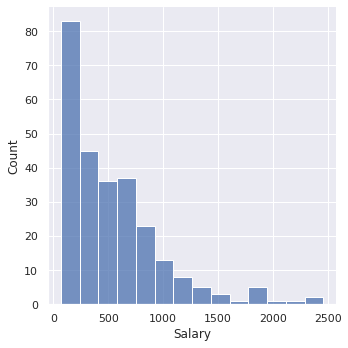

In [7]:
# Check distribution
sns.displot(df_hitters_num_nonull['Salary']);

In [8]:
# Check the correlation between the dependent and independent variables
correlation = df_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

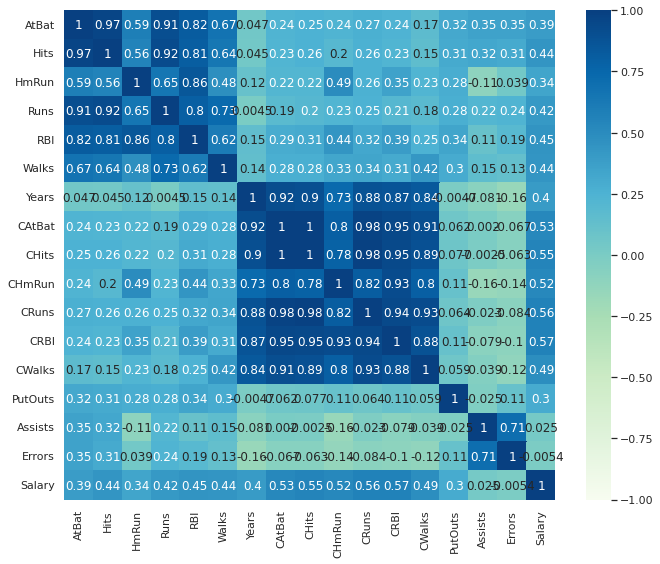

In [9]:
# Check for multicolinearity
plt.figure(figsize=(11,9))
sns.heatmap(df_hitters.corr(),
            vmin = -1, 
            vmax = 1,
            cmap ="GnBu",
            annot=True)
plt.show()

# Declare the dependent and independent variables

In [10]:
X = df_hitters_num_nonull.drop('Salary', axis = 1)
y = df_hitters_num_nonull['Salary']

# Split the data into training and testing parts

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)

# Rescale the data

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform linear regression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)

Linear Regression coefficients are:  [-204.82887242  182.88781053   53.627109    -37.58051499  -24.71270153
  105.97300187  -41.80471199 -923.36465716  772.95791167   21.40521982
  503.05021339   68.38459334 -182.40495232  108.96992672   70.78278198
  -20.61646835   61.84289863  -65.70783349  -30.37871495]
Linear Regression y-intercept is:  531.6730434782609


## Model evaluation

In [15]:
lin_reg_y_pred = lin_reg.predict(X_test)
lin_reg_y_pred

array([ 394.06180251,  458.00924032,  767.66375279,  807.41509201,
        339.30714068,  299.83821471,  181.62268172,  467.16612891,
       1184.23597418,  515.42102796,  510.7176111 ,  454.17398148,
        870.38465113,  756.89462064,  217.29502621,  282.52667731,
        349.57720581,  713.59438048,  166.36777321,  673.72835539,
        859.60784152,  194.57911162,  579.31123966, 1143.69384049,
       1237.52270197, 1521.1463277 ,  766.40105831, 1131.91968819,
        583.94184525, 1068.98052355,  477.36680135,  338.93363562,
        335.32810606,  511.29832516,  196.95376682,  271.68001916,
        238.42132393, 1011.56145836,  631.25428143,  215.05226876,
        372.08582241,  420.28224248,  879.86035499,  337.34113691,
        609.33094921,  261.26832339,  586.69437141,  565.1858545 ,
        663.07809557,  564.95698601, 2139.52937353,  745.75335416,
        355.8426283 ,  447.28501917, 1165.4056462 ,  726.8658397 ,
        578.0419212 ,   66.92936772,  264.74705959,  171.65040

In [16]:
lin_comp = pd.DataFrame({'Predicted': lin_reg_y_pred, 'Actual': y_test})
lin_comp

,Predicted,Actual
14,394.061803,240.0
181,458.009240,737.5
177,767.663753,1300.0
124,807.415092,737.5
277,339.307141,475.0
...,...,...
205,401.189331,90.0
149,510.240883,365.0
128,523.543233,662.5
99,357.948516,490.0


In [17]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))

Linear Regression Model RMSE is:  310.9746992565849
Linear Regression Model Training Score:  0.5631284027044152
Linear Regression Model Testing Score:  0.2935662800386146


> The results is not good

# Perform ridge regression 

In [18]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [19]:
# Initializing the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [20]:
# Fitting the ridge regressor
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1),
        scoring='neg_mean_absolute_error')

## Model evaluation

In [21]:
ridge_reg_y_pred = ridge.predict(X_test)

print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 9.9
Ridge model coefficients: [-97.56758314  87.85999718  11.02552327  27.85042065   3.99322206
  62.72302932 -62.50839898 -13.67671118 126.48315293  27.25151176
 152.07786492  81.96531429 -94.84406465 110.4140283   31.71949615
 -19.05187153  41.06090993 -65.55005684 -19.60489256]
Ridge model intercept: 531.6730434782609


In [22]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

Ridge Regression Model RMSE is:  272.9345803975046
Ridge Regression Model Training Score:  0.5222253910323404
Ridge Regression Model Testing Score:  0.45582518869545186


> Now the results is better than before

# Perform lasso regression

In [23]:
# Initializing the lasso regressor
lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)

In [24]:
# Fitting the lasso regressor
lasso.fit(X_train,y_train)

LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=1), tol=1)

## Model evaluation

In [25]:
lasso_reg_y_pred = lasso.predict(X_test)

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 8.1
Lasso model coefficients: [ 59.30696561  43.17809703  35.22592741   2.98208837   2.59834041
  52.54614839 129.79022395  51.1508444   22.6054522    9.38659423
   0.77820404   0.16585094  -4.48254376  98.01603726  -0.
 -10.90552476  16.79735916 -67.87745813  -0.        ]
Lassso model intercept: 531.6730434782609


In [26]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso Regression Model RMSE is:  288.6972827576649
Lasso Regression Model Training Score:  0.43949515335473843
Lasso Regression Model Testing Score:  0.391155060492828


> As we can see, it's better than linear model but not better than Ridge model

# Compare The All Results

> ### R^2

In [27]:
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.5631284027044152
Linear Regression Model Testing Score:  0.2935662800386146
Ridge Regression Model Training Score:  0.5222253910323404
Ridge Regression Model Testing Score:  0.45582518869545186
Lasso Regression Model Training Score:  0.43949515335473843
Lasso Regression Model Testing Score:  0.391155060492828


### Root mean squared error

In [28]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  310.9746992565849
Ridge Regression Model RMSE is:  272.9345803975046
Lasso Regression Model RMSE is:  288.6972827576649


# Replacing the missing values in the DataFrame

In [29]:
df_hitters_nan = df_hitters_num[df_hitters_num['Salary'].isnull()]
df_hitters_nan

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN,1,1,1


In [30]:
X_nan = df_hitters_nan.drop('Salary', axis = 1)
y_nan = df_hitters_nan['Salary']

In [31]:
scaler = StandardScaler()
X_nan = scaler.fit_transform(X_nan)

In [32]:
nan_pred = ridge.predict(X_nan)
nan_pred

array([ 327.88409964,  102.33470814, 1005.32517867,  308.65606037,
        782.15142942, 1304.01796541,  316.8790604 ,  811.55354133,
        262.73261066,  642.49848965,  358.02407076,  583.88683242,
       1362.3095974 ,  140.59216519,  616.99509322,   53.87204293,
        386.17980065,  705.58594599,  432.64134262,  399.23962853,
        994.3239971 ,  189.33099572,  405.04813882,  767.4780321 ,
        613.69655199,  722.89823316, 1095.63581472,  234.88616395,
        332.92617656, 1020.31867615,  574.21636977,  362.66335721,
        504.80993866,  212.87913951,  447.60744395,  606.99671832,
        177.70222107,  388.21363495,  364.91109779,  281.15822281,
        306.69287049,  621.64225657,  366.86382771,  518.20625574,
        394.07190079,  535.51105584,  547.37541069, 1127.09509672,
        839.63533186,  116.26854664,  190.13018379,  401.025101  ,
        269.05285799,  211.68568865,  809.50289744,  267.98384517,
       1210.62989161, 1016.14525989,  418.13069892])

In [33]:
# df_hitters_nan.drop(['Salary'], axis=1)
df_nan_full = df_hitters_nan.copy()
df_nan_full['Salary'] = nan_pred
df_nan_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,327.884100,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,102.334708,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,1005.325179,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,308.656060,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,782.151429,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1304.017965,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,316.879060,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,811.553541,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,262.732611,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,642.498490,1,1,1
